In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card/Creditcard_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/credit-card/Creditcard_data.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


# **Balancing the Dataset**

In [4]:
# Separating the class
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (763, 31)
class 1: (9, 31)


total class of 1 and 0: Class
1    763
0    763
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='Class'>

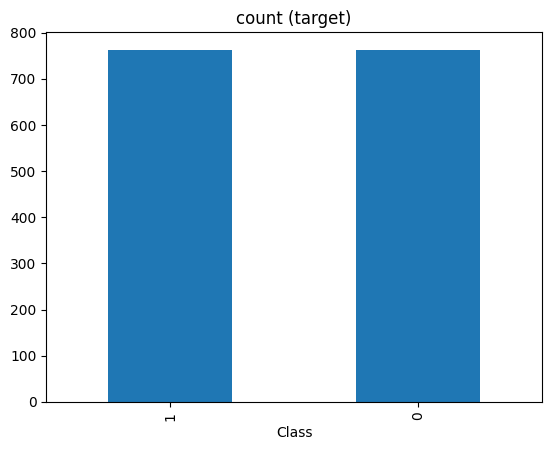

In [5]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Class'].value_counts())
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

In [6]:
import imblearn
import collections
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

x = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('original dataset shape:', collections.Counter(y_train))
print('Resample dataset shape', collections.Counter(y_ros))

original dataset shape: Counter({0: 609, 1: 8})
Resample dataset shape Counter({0: 609, 1: 609})


In [7]:
# Merging the Balanced Data
train_data = pd.concat([x_ros, y_ros], axis = 1)

In [8]:
train_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,259,-0.363608,1.104008,1.300678,0.070314,0.075180,-1.010396,0.683396,-0.073378,-0.401866,...,-0.261158,-0.685436,-0.013662,0.336313,-0.157577,0.071699,0.245539,0.099037,0.99,0
1,41,0.986063,-0.202965,-0.492768,0.407691,0.305660,-0.230529,0.585028,-0.208225,-0.247503,...,-0.305874,-1.216555,-0.077602,-0.741341,0.286881,0.200347,-0.075203,0.027271,169.05,0
2,417,-0.473731,0.697340,2.279600,1.359875,0.342429,1.392886,0.289971,0.170677,0.578966,...,-0.462425,-0.486810,-0.235667,-0.726568,0.085981,-0.351095,0.289067,-0.043030,8.61,0
3,259,1.095067,-0.014393,1.408552,1.266546,-0.944751,0.029578,-0.598515,0.175291,0.485231,...,0.013107,0.248009,-0.002564,0.570100,0.387137,-0.442319,0.074531,0.032215,9.99,0
4,525,-0.755011,-0.517761,1.760091,-0.654206,-0.039143,-0.492847,-0.047345,0.118936,0.734444,...,-0.049608,-0.200904,0.268931,0.108087,-0.468660,0.729549,-0.017462,0.077163,79.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
1214,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1215,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
1216,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1


In [9]:
# Simple Random Sampling
z = 1.96
p = 0.5
e = 0.05

# Simple Sample size 
sim_ran_size = round((z**2 * p * (1 - p)) / (e**2)) # 384

np.random.seed = 42

In [10]:
sam = train_data.sample(n = sim_ran_size, random_state = 42)

x = sam.drop('Class', axis=1)
y = sam['Class']
sam_1_x_train, sam_1_x_test, sam_1_y_train, sam_1_y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
sam_1_x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
184,192,-0.351287,1.183754,0.530794,0.543891,0.798441,-0.804472,1.563170,-0.935794,0.633634,...,0.596401,-0.121755,0.668124,-0.057380,0.301398,-0.730946,-0.538616,-0.037212,-0.479956,1.79
100,304,1.049639,0.066437,0.059213,0.285469,0.635754,1.473074,-0.376993,0.579045,-0.182240,...,-0.212006,-0.141137,-0.304712,0.206105,-1.397547,-0.093121,0.227115,0.042340,0.001972,1.98
323,12,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,...,-0.113910,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99
914,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
462,257,-0.599318,0.887525,1.579214,-0.113728,0.304991,-0.182829,0.503722,0.241375,-0.722596,...,-0.088091,-0.137631,-0.524586,-0.057729,-0.058980,-0.320342,0.089180,0.058979,0.098448,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
628,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
561,256,-1.377245,0.714823,2.507513,0.865082,-0.290489,1.077328,0.032507,0.510946,0.717788,...,-0.125335,-0.341853,-0.606731,-0.099740,-0.009123,0.328379,-0.506683,-0.032235,0.139841,13.53
1182,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00


In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)

model.fit(sam_1_x_train, sam_1_y_train)

y_pred = model.predict(sam_1_x_test)

accuracy = accuracy_score(sam_1_y_test, y_pred)
accuracy * 100

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


85.71428571428571

In [13]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=3)

model.fit(sam_1_x_train, sam_1_y_train)

y_pred = model.predict(sam_1_x_test)

accuracy = accuracy_score(sam_1_y_test, y_pred)
accuracy * 100

92.20779220779221

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, max_depth = 4)

model.fit(sam_1_x_train, sam_1_y_train)

y_pred = model.predict(sam_1_x_test)

accuracy = accuracy_score(sam_1_y_test, y_pred)
accuracy * 100

98.7012987012987

In [15]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)

model.fit(sam_1_x_train, sam_1_y_train)

y_pred = model.predict(sam_1_x_test)

accuracy = accuracy_score(sam_1_y_test, y_pred)
accuracy * 100

84.4155844155844

In [16]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(sam_1_x_train, sam_1_y_train)

y_pred = model.predict(sam_1_x_test)

accuracy = accuracy_score(sam_1_y_test, y_pred)
accuracy * 100

98.7012987012987

In [17]:
# Stratified Sampling

sam_2 = train_data.groupby('Class', group_keys=False).apply(lambda x: x.sample(400))

print(sam_2)

      Time        V1        V2        V3        V4        V5        V6  \
610     16  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
398     93 -1.640014 -0.479831  1.613630  2.997979 -3.803788  5.051812   
604    335  1.295946  1.011835 -3.191860  0.471478  3.350241  2.432783   
207    402 -0.160626 -0.064459  2.531072 -1.328268 -0.970430  0.185030   
585    417 -0.791993  1.054007 -0.110012 -1.234186  2.751355  3.443064   
...    ...       ...       ...       ...       ...       ...       ...   
1153   529 -2.000567 -2.495484  2.467149  1.140053  2.462010  0.594262   
1183   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
973    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
1060   529 -2.000567 -2.495484  2.467149  1.140053  2.462010  0.594262   
1203   574  1.257719  0.364739  0.306923  0.690638 -0.357792 -1.067481   

            V7        V8        V9  ...       V21       V22       V23  \
610  -0.878586  0.445290 -0.446196  ..

In [18]:
x = sam_2.drop('Class', axis=1)
y = sam_2['Class']
sam_2_x_train, sam_2_x_test, sam_2_y_train, sam_2_y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)

model.fit(sam_2_x_train, sam_2_y_train)

y_pred = model.predict(sam_2_x_test)

accuracy = accuracy_score(sam_2_y_test, y_pred)
accuracy * 100

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


93.125

In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=3)

model.fit(sam_2_x_train, sam_2_y_train)

y_pred = model.predict(sam_2_x_test)

accuracy = accuracy_score(sam_2_y_test, y_pred)
accuracy * 100

96.875

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, max_depth = 4, n_estimators = 500)

model.fit(sam_2_x_train, sam_2_y_train)

y_pred = model.predict(sam_2_x_test)

accuracy = accuracy_score(sam_2_y_test, y_pred)
accuracy * 100

100.0

In [22]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)

model.fit(sam_2_x_train, sam_2_y_train)

y_pred = model.predict(sam_2_x_test)

accuracy = accuracy_score(sam_2_y_test, y_pred)
accuracy * 100


KeyboardInterrupt



In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(sam_2_x_train, sam_2_y_train)

y_pred = model.predict(sam_2_x_test)

accuracy = accuracy_score(sam_2_y_test, y_pred)
accuracy * 100

In [ ]:
# Cluster Sampling
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    N = len(df)
    K = int(N/n_per_cluster)
    data = None
    for k in range(K):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

sam_3 = get_clustered_Sample(df = train_data, n_per_cluster = 100, num_select_clusters = 2)
sam_3

In [ ]:
x = sam_3.drop('Class', axis=1)
y = sam_3['Class']
sam_3_x_train, sam_3_x_test, sam_3_y_train, sam_3_y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)

model.fit(sam_3_x_train, sam_3_y_train)

y_pred = model.predict(sam_3_x_test)

accuracy = accuracy_score(sam_3_y_test, y_pred)
accuracy * 100

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=3)

model.fit(sam_3_x_train, sam_3_y_train)

y_pred = model.predict(sam_3_x_test)

accuracy = accuracy_score(sam_3_y_test, y_pred)
accuracy * 100

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, max_depth = 4)

model.fit(sam_3_x_train, sam_3_y_train)

y_pred = model.predict(sam_3_x_test)

accuracy = accuracy_score(sam_3_y_test, y_pred)
accuracy * 100

In [ ]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)

model.fit(sam_3_x_train, sam_3_y_train)

y_pred = model.predict(sam_3_x_test)

accuracy = accuracy_score(sam_3_y_test, y_pred)
accuracy * 100

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(sam_3_x_train, sam_3_y_train)

y_pred = model.predict(sam_3_x_test)

accuracy = accuracy_score(sam_3_y_test, y_pred)
accuracy * 100

In [ ]:
# Systematic Sampling

def systematic_sampling(df, step):
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
 
sam_4 = systematic_sampling(train_data, 3)
sam_4

In [ ]:
x = sam_4.drop('Class', axis=1)
y = sam_4['Class']
sam_4_x_train, sam_4_x_test, sam_4_y_train, sam_4_y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)

model.fit(sam_4_x_train, sam_4_y_train)

y_pred = model.predict(sam_4_x_test)

accuracy = accuracy_score(sam_4_y_test, y_pred)
accuracy * 100

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=5)

model.fit(sam_4_x_train, sam_4_y_train)

y_pred = model.predict(sam_4_x_test)

accuracy = accuracy_score(sam_4_y_test, y_pred)
accuracy * 100

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, max_depth = 4)

model.fit(sam_4_x_train, sam_4_y_train)

y_pred = model.predict(sam_4_x_test)

accuracy = accuracy_score(sam_4_y_test, y_pred)
accuracy * 100

In [ ]:
from sklearn import metrics
print('Training Accuracy : ', 
      metrics.accuracy_score(sam_4_y_train,
                             model.predict(sam_4_x_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(sam_4_y_test, 
                             model.predict(sam_4_x_test))*100)

In [ ]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)

model.fit(sam_4_x_train, sam_4_y_train)

y_pred = model.predict(sam_4_x_test)

accuracy = accuracy_score(sam_4_y_test, y_pred)
accuracy * 100

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(sam_4_x_train, sam_4_y_train)

y_pred = model.predict(sam_4_x_test)

accuracy = accuracy_score(sam_4_y_test, y_pred)
accuracy * 100

In [28]:
# Bootstrap Sampling
sam_5 = train_data.sample(n=550, replace=True)
sam_5

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1182,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1146,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
625,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
800,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1198,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,528,1.358535,-0.443057,0.700476,-0.734666,-1.138176,-0.830189,-0.637162,-0.074408,-1.078981,...,-0.031771,-0.219789,0.147941,0.517099,0.186110,-0.510075,0.009997,0.014218,3.71,0
575,423,1.161123,0.654050,0.211966,2.521864,0.156582,-0.583461,0.442847,-0.120914,-0.959401,...,0.025278,0.046085,-0.025789,0.377012,0.585970,0.080868,-0.028148,0.008323,3.75,0
401,411,-0.566531,-0.057728,-0.825121,-1.040222,1.059728,3.811274,0.066048,1.280204,-0.504435,...,0.208875,-0.046195,0.567673,1.039253,-0.371477,0.997043,-0.198837,-0.019047,235.70,0
472,55,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0


In [29]:
x = sam_5.drop('Class', axis=1)
y = sam_5['Class']
sam_5_x_train, sam_5_x_test, sam_5_y_train, sam_5_y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)

model.fit(sam_5_x_train, sam_5_y_train)

y_pred = model.predict(sam_5_x_test)

accuracy = accuracy_score(sam_5_y_test, y_pred)
accuracy * 100

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


93.63636363636364

In [31]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=5)

model.fit(sam_5_x_train, sam_5_y_train)

y_pred = model.predict(sam_5_x_test)

accuracy = accuracy_score(sam_5_y_test, y_pred)
accuracy * 100

99.0909090909091

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, max_depth = 4)

model.fit(sam_5_x_train, sam_5_y_train)

y_pred = model.predict(sam_5_x_test)

accuracy = accuracy_score(sam_5_y_test, y_pred)
accuracy * 100

100.0

In [34]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)

model.fit(sam_5_x_train, sam_5_y_train)

y_pred = model.predict(sam_5_x_test)

accuracy = accuracy_score(sam_5_y_test, y_pred)
accuracy * 100

96.36363636363636

In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(sam_5_x_train, sam_5_y_train)

y_pred = model.predict(sam_5_x_test)

accuracy = accuracy_score(sam_5_y_test, y_pred)
accuracy * 100

99.0909090909091